# Final Project Submission

- Student Name: Deztany Jackson
- Student Pace: Self Pace
- Scheduled Project Review:
- Instructor Name: Morgan Jones
- Blog Post URL:


### Quesitons /Comments
- Aggregate Table for Dataset understanding - mean
- When do we do the TP/FP/TN Stuff?
    - Do cross tab table
- Explore dataset
    - Value Counts: group by Table
    - Graph Prices
    - Historgram of dataset - yes
    - How many of each category is there now....% of dataset
- Look into function of class of cross valudation from workflow model
- How do we get value counts for each column by Catgetory?? EDA
- Plot distribution of the continous numerical values one Way
- Plot categorical numerical values another way?
- Outlier removal How to check?
- Format font and labels in visuals
- Remove warnings from 

## Classification of Paris Housings - Luxury vs Basic

# Business Understanding

In [ ]:
#Stakeholder and Business Problem


# Data Understanding

In [214]:
#Import packages

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
#from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix,classification_report,recall_score,accuracy_score, auc
precision_score, f1_score, confusion_matrix, plot_roc_curve, 
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')
#from imblearn.metrics import classification_report_im
#from imblearn.over_sampling import SMOTE
#from imblearn.pipeline import Pipeline as ImPipeline

Describe the dataset and where it came from and links [kaggle]

In [33]:
# Import csv file
paris_df = pd.read_csv("data/ParisHousingClass.csv")
paris_df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


This dataset has 10000 rows and 18 columns (including the target)

In [34]:
#Shape of dataset
paris_df.shape

(10000, 18)

In [35]:
#Describe the dataset
paris_df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [36]:
#Information on dataset
paris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [37]:
#drop columns that don't seem to add value
paris_df = paris_df.drop(columns="isNewBuilt",axis =1)


In [38]:
#checking shape after deletion
paris_df.shape

(10000, 17)

# There are no textual values although some are categorical
- Num of Rooms
- Has Yard
- Has Pool


In [25]:
#Any null values? - No NULL Values
#paris_df.isnull().sum()
#No Null values

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [32]:
#Checking for duplicates - None
#paris_df.duplicated().sum() 

0

# Describe data Features

- Plot Distribution of data
- Multicolinearity
- Heatmap


In [39]:
#Renaming columns for better clarity
old_cols = []
new_col = ['Building_Size(m)','Num_of_Rooms','Has_Yard','Has_Pool','Num_of_Floors','City_Code','City_Part_Range',
           'Num_Previous_Owners', 'Year_Built','Has_Storm_Protector',
           'Basement_Size(m)','Attic_Size(m)', 'Garage_Size(m)', 'Has_Storage_Room','Num_of_Guest_Rooms','Price','Category']
col_dict = {}
for ind, col in enumerate(paris_df.columns):
    col_dict[col] = new_col[ind]
print(col_dict)
paris_df.rename(columns = col_dict, inplace= True)

{'squareMeters': 'Building_Size(m)', 'numberOfRooms': 'Num_of_Rooms', 'hasYard': 'Has_Yard', 'hasPool': 'Has_Pool', 'floors': 'Num_of_Floors', 'cityCode': 'City_Code', 'cityPartRange': 'City_Part_Range', 'numPrevOwners': 'Num_Previous_Owners', 'made': 'Year_Built', 'hasStormProtector': 'Has_Storm_Protector', 'basement': 'Basement_Size(m)', 'attic': 'Attic_Size(m)', 'garage': 'Garage_Size(m)', 'hasStorageRoom': 'Has_Storage_Room', 'hasGuestRoom': 'Num_of_Guest_Rooms', 'price': 'Price', 'category': 'Category'}


In [ ]:
#Are we removing any features for general importance?


In [41]:
#Looking at values based on categories
#Looking at the binary values shows a few things.  Every Luxury home has: Pool, Newly Built,Has Yard and Has Pool
paris_df.groupby(["Category"]).mean()

,Building_Size(m),Num_of_Rooms,Has_Yard,Has_Pool,Num_of_Floors,City_Code,City_Part_Range,Num_Previous_Owners,Year_Built,Has_Storm_Protector,Basement_Size(m),Attic_Size(m),Garage_Size(m),Has_Storage_Room,Num_of_Guest_Rooms,Price
Category,,,,,,,,,,,,,,,,
Basic,49999.331883,50.363251,0.43755,0.423927,50.318374,50181.889410,5.513566,5.535661,2005.469376,0.499485,5045.484946,5034.319977,553.342416,0.502576,4.990841,5.005929e+06
Luxury,48977.982609,50.324901,1.00000,1.000000,49.985771,50526.527273,5.486166,5.425296,2005.620553,0.502767,4947.611067,4984.443478,551.593676,0.505929,5.020553,4.907260e+06


May remove isNewBuilt because it doesnt offer any newer information than the year it was made...redundant

In [42]:
#Pair plot for quick view of the datasets distribution 
#sns.set(rc={'figure.figsize':(20,15)})
#sns.pairplot(paris_df)
paris_df.columns

Index(['Building_Size(m)', 'Num_of_Rooms', 'Has_Yard', 'Has_Pool',
       'Num_of_Floors', 'City_Code', 'City_Part_Range', 'Num_Previous_Owners',
       'Year_Built', 'Has_Storm_Protector', 'Basement_Size(m)',
       'Attic_Size(m)', 'Garage_Size(m)', 'Has_Storage_Room',
       'Num_of_Guest_Rooms', 'Price', 'Category'],
      dtype='object')

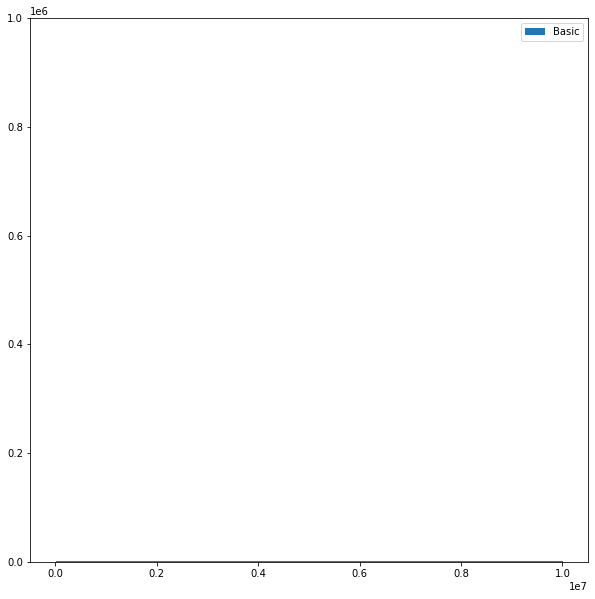

In [23]:
#Plot the aVERAGE Price versus Luxury Basic

fig,ax = plt.subplots(figsize =(10,10), facecolor = "white")

ax.hist( paris_df["price"])
plt.ylim([0, 1000000])

ax.legend(labels = ["Basic", "Luxury"])


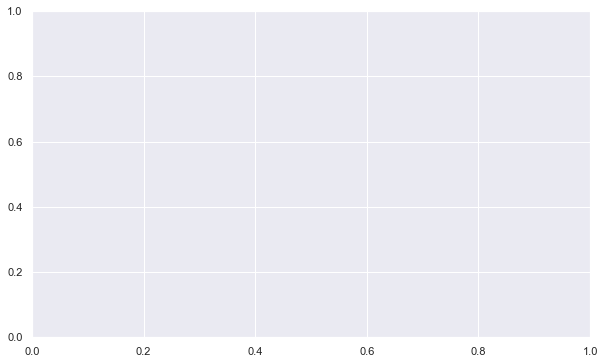

In [36]:
# Model the Category variables vs the Price Histogram with Legend Homecount
#Show a cross tab table
fig, ax = plt.subplots(figsize=(10, 6),facecolor = "white")


# Data Preparation

In [43]:
#Copy original dataframe
pdf = paris_df.copy()

In [36]:
#Changing Basic and Luxury to numerical values in the Category Column
#cat_dict = {"Basic":0, "Luxury":1}
#pdf["Category"] = pdf["Category"].apply(lambda x:cat_dict[x])

KeyError: 0

In [31]:
pdf.head()

,Building_Size(m),Num_of_Rooms,Has_Yard,Has_Pool,Num_of_Floors,City_Code,City_Part_Range,Num_Previous_Owners,Year_Built,Has_Storm_Protector,Basement_Size(m),Attic_Size(m),Garage_Size(m),Has_Storage_Room,Num_of_Guest_Rooms,Price,Category
0,75523,3,0,1,63,9373,3,8,2005,1,4313,9005,956,0,7,7559081.5,0
1,80771,39,1,1,98,39381,8,6,2015,0,3653,2436,128,1,2,8085989.5,1
2,55712,58,0,1,19,34457,6,8,2021,0,2937,8852,135,1,9,5574642.1,0
3,32316,47,0,0,6,27939,10,4,2012,1,659,7141,359,0,3,3232561.2,0
4,70429,19,1,1,90,38045,3,7,1990,0,8435,2429,292,1,4,7055052.0,1


In [296]:
X = paris_df.drop("Category", axis = 1)
y = paris_df["Category"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, stratify = y)

<AxesSubplot:title={'center':'Verify that class distributuion in train is same as input data'}, xlabel='Category'>

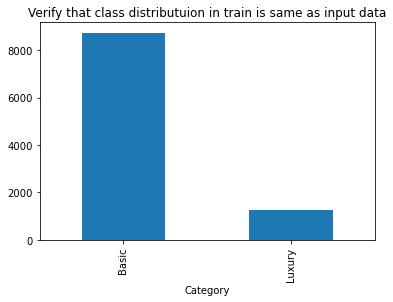

In [291]:
#Before 
pdf.pivot_table(index='Category', aggfunc='size').plot(kind='bar', title='Verify that class distributuion in train is same as input data')


In [297]:
#Checking to see if the value counts are stratified for imbalance
print(y_test.value_counts())
print(y_train.value_counts())

Basic     2184
Luxury     316
Name: Category, dtype: int64
Basic     6551
Luxury     949
Name: Category, dtype: int64


# Modeling

## Model 1 - Dummy Classifier Model 

[Dummy Classifier- Abiheet Sahoo, 2020 ](https://towardsai.net/p/data-science/dealing-with-class-imbalance%E2%80%8A-%E2%80%8A-dummy-classifiers)

In [54]:
dummy_paris_df = DummyClassifier(strategy="most_frequent")
dummy_paris_df.fit(X_train, y_train)


DummyClassifier(strategy='most_frequent')

In [108]:
cv_results = cross_val_score(dummy_paris_df, X_train, y_train, cv=5)
cv_results.mean()

0.8756

In [109]:
#Score of guessing Luxury
print("Percent of guess Luxury Accuracy= ", round(1-cv_results.mean(),2), "%")

Percent of guess Luxury Accuracy=  0.12 %


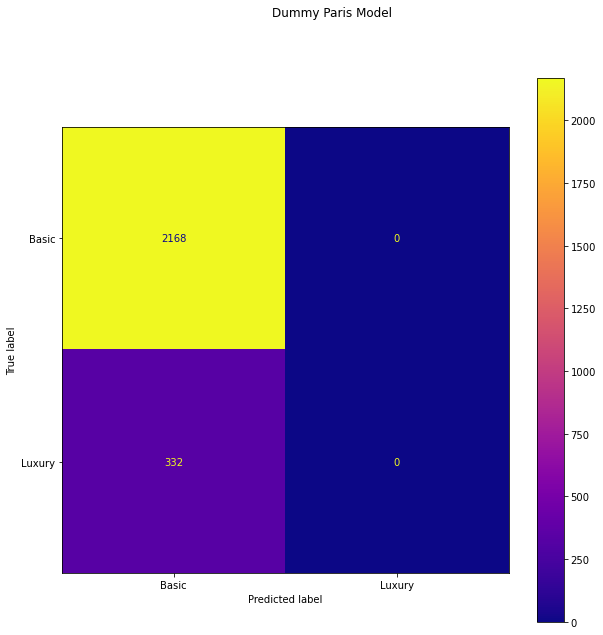

In [127]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Dummy Paris Model")
plot_confusion_matrix(dummy_paris_df, X_test, y_test, ax=ax, cmap="plasma");
#Increase the font size in the labels

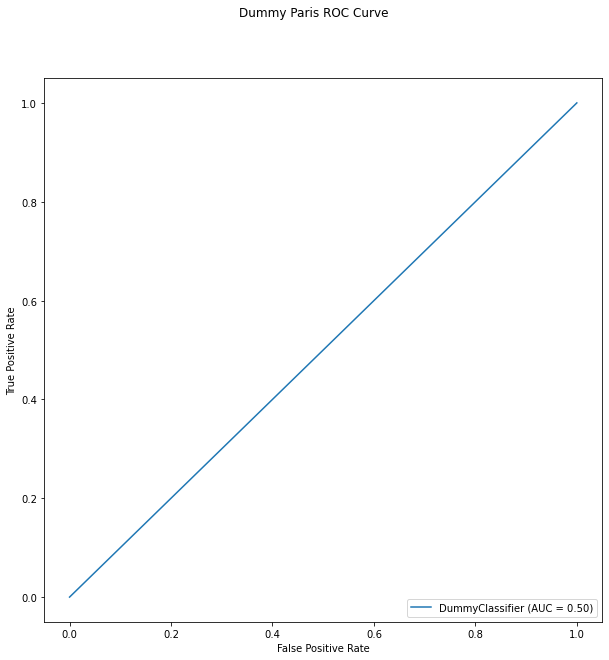

In [117]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Dummy Paris ROC Curve")
plot_roc_curve(dummy_paris_df, X_test, y_test, ax=ax)
#Increase the font size and labels

What does this tell me?

## Model 2.1 - Logistic Regression Model (Simple Model)

In [145]:
#Instantiate
lr_simple = LogisticRegression(random_state = 42,penalty= "none") 
#Fit training data
lr_simple.fit(X_train,y_train)
#Predict with test
lr_y_train_pred = lr_simple.predict(X_train)
lr_y_test_pred = lr_simple.predict(X_test)


###  Model 2.1 - Logistic Regression Model (Simple Model) Evaluation

#### Training Data Evaluation

In [122]:
### Train
scores = cross_val_score(lr_simple, X_train, y_train, cv=5 )
scores.mean()

/Users/deztanyjackson/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8756

In [157]:
#Printing out report with scores -
print(classification_report(y_train, lr_y_train_pred))

              precision    recall  f1-score   support

       Basic       0.88      1.00      0.93      6567
      Luxury       0.00      0.00      0.00       933

    accuracy                           0.88      7500
   macro avg       0.44      0.50      0.47      7500
weighted avg       0.77      0.88      0.82      7500



In [ ]:
#Speak to the ability to pick Precision of Basic and none for luxury...imbalanced data

In [137]:
#Print out array confusion matrix
print(confusion_matrix(y_train, lr_y_train_pred, labels = ["Basic","Luxury"]))

[[6567    0]
 [ 933    0]]


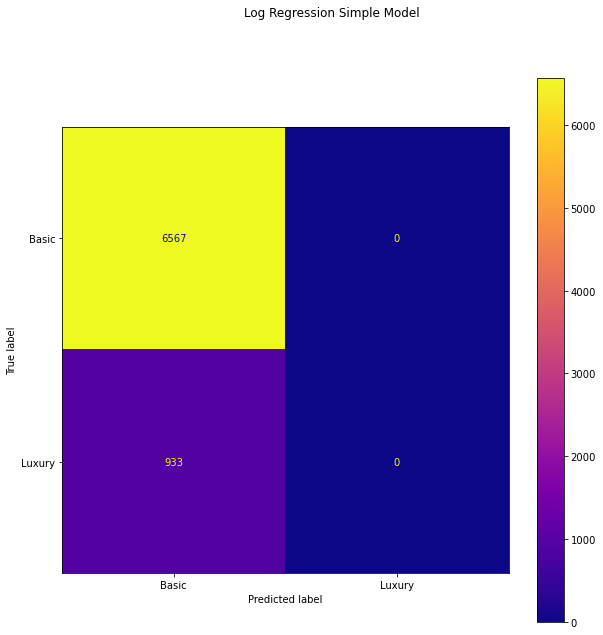

In [143]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Log Regression Simple Model")
plot_confusion_matrix(lr_simple, X_train, y_train, ax=ax, cmap="plasma");

#### Test Data Evaluation

In [162]:
scores = cross_val_score(lr_simple, X_test, y_test, cv=5 )
scores.mean()

0.8672000000000001

In [154]:
#Printing out report with scores -
print(classification_report(y_test, lr_y_test_pred))

              precision    recall  f1-score   support

       Basic       0.87      1.00      0.93      2168
      Luxury       0.00      0.00      0.00       332

    accuracy                           0.87      2500
   macro avg       0.43      0.50      0.46      2500
weighted avg       0.75      0.87      0.81      2500



In [155]:
#Print out array confusion matrix
print(confusion_matrix(y_test, lr_y_test_pred, labels = ["Basic","Luxury"]))

[[2168    0]
 [ 332    0]]


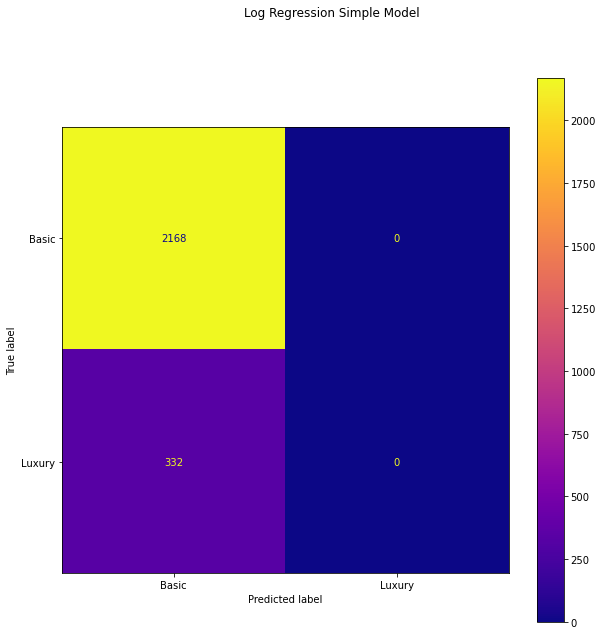

In [156]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Log Regression Simple Model")
plot_confusion_matrix(lr_simple, X_test, y_test, ax=ax, cmap="plasma");

In [ ]:
# Precision decreased slightly with test data, but in the grand scheme of things still not good. Not able to correclty guess Luxury
#Basics was incorreclty guess

## Model 2.2 - Decision Tree Model (Simple Model)

In [257]:
#Instantiate
dt_simple = DecisionTreeClassifier(random_state=42, criterion="entropy")
#Fit training data
dt_simple.fit(X_train,y_train)
#Predict with test
dt_y_train_pred = dt_simple.predict(X_train)
dt_y_test_pred = dt_simple.predict(X_test)
dt_y_test_prob = dt_simple.predict_proba(X_test)

#### Train  Data Evaluation

In [258]:
scores = cross_val_score(dt_simple, X_train, y_train, cv=5 )
scores.mean()

0.8749333333333332

In [259]:
#Printing out report with scores -
print(classification_report(y_train, dt_y_train_pred))

              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      6567
      Luxury       1.00      1.00      1.00       933

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



In [260]:
print(confusion_matrix(y_train, dt_y_train_pred, labels = ["Basic","Luxury"]))

[[6567    0]
 [   0  933]]


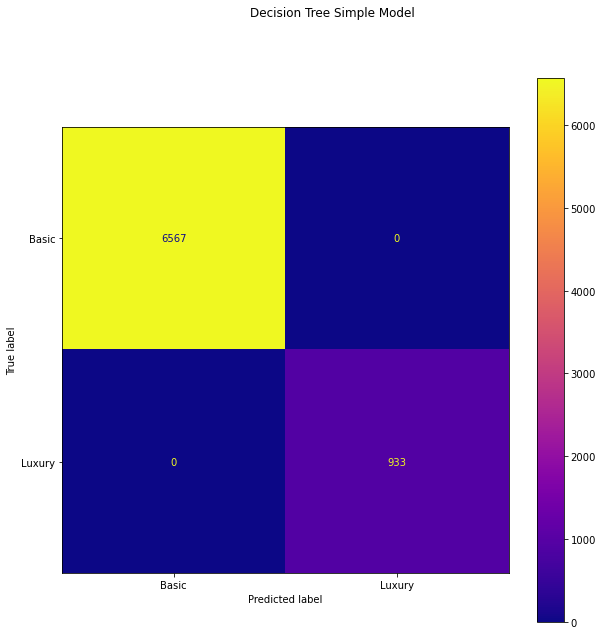

In [261]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Decision Tree Simple Model")
plot_confusion_matrix(dt_simple, X_train, y_train, ax=ax, cmap="plasma");

#### Test Data Evaluation

In [262]:
scores = cross_val_score(dt_simple, X_test, y_test, cv=5 )
scores.mean()

0.8668000000000001

In [263]:
print(confusion_matrix(y_test, dt_y_test_pred, labels = ["Basic","Luxury"]))

[[2004  164]
 [ 170  162]]


In [264]:
print(classification_report(y_test, dt_y_test_pred))

              precision    recall  f1-score   support

       Basic       0.92      0.92      0.92      2168
      Luxury       0.50      0.49      0.49       332

    accuracy                           0.87      2500
   macro avg       0.71      0.71      0.71      2500
weighted avg       0.87      0.87      0.87      2500



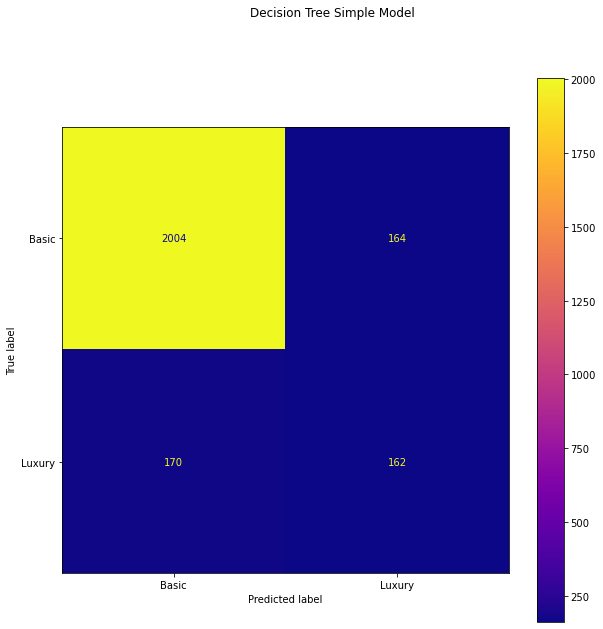

In [265]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Decision Tree Simple Model")
plot_confusion_matrix(dt_simple, X_test, y_test, ax=ax, cmap="plasma");

[Explaination of Precsion/Recall Curve Use](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

In [266]:
## Add the Precision/Recall Curve to the decison tree stuff
#probability of luxury scores only

dt_precision,dt_recall, _ = precision_recall_curve(y_test, dt_y_test_prob[:,1],pos_label=[ "Luxury"])
#dt_f1 = f1_score(y_test, dt_y_test_pred, pos_label=['Basic', 'Luxury']) 
dt_auc =  auc(dt_recall, dt_precision)
print("auc:", round(dt_auc,2))
#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))            

auc: 0.53


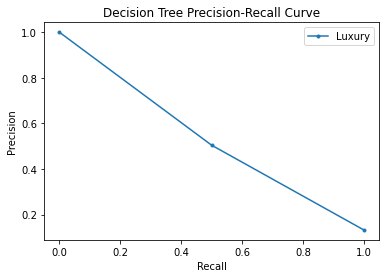

In [225]:
plt.plot(dt_recall, dt_precision, marker='.', label='Luxury')
#axis labels
plt.title("Decision Tree Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
#Legend
plt.legend()

In [179]:
## Optional, show visualization of tree

## Model 2.3 - Random Forest Model (Simple Model)

In [267]:
#Instantiate
rf_simple = RandomForestClassifier(random_state = 42) 
#Fit training data
rf_simple.fit(X_train,y_train)
#Predict with test
rf_y_train_pred = rf_simple.predict(X_train)
rf_y_test_pred = rf_simple.predict(X_test)
rf_y_test_prob = rf_simple.predict_proba(X_test)

#### Train Data Evaluation

In [280]:
scores = cross_val_score(rf_simple, X_train, y_train, cv=5 )
scores.mean()

0.8725333333333334

In [281]:
print(confusion_matrix(y_train, rf_y_train_pred, labels = ["Basic","Luxury"]))

[[6567    0]
 [   0  933]]


In [283]:
print(classification_report(y_train, rf_y_train_pred))

              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      6567
      Luxury       1.00      1.00      1.00       933

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



#### Test Data Evaluation

In [268]:
scores = cross_val_score(rf_simple, X_test, y_test, cv=5 )
scores.mean()

0.8612

In [269]:
print(confusion_matrix(y_test, rf_y_test_pred, labels = ["Basic","Luxury"]))

[[2050  118]
 [ 228  104]]


In [270]:
print(classification_report(y_test, rf_y_test_pred))

              precision    recall  f1-score   support

       Basic       0.90      0.95      0.92      2168
      Luxury       0.47      0.31      0.38       332

    accuracy                           0.86      2500
   macro avg       0.68      0.63      0.65      2500
weighted avg       0.84      0.86      0.85      2500



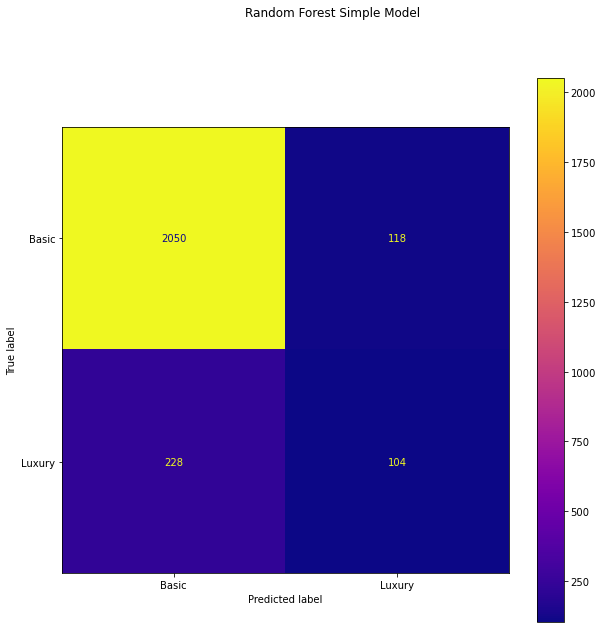

In [272]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Random Forest Simple Model")
plot_confusion_matrix(rf_simple, X_test, y_test, ax=ax, cmap="plasma");

In [275]:
## Add the Precision/Recall Curve to the decison tree stuff
#probability of luxury scores only


rf_precision,rf_recall, _ = precision_recall_curve(y_test, rf_y_test_prob[:,1],pos_label=[ "Luxury"])
#dt_f1 = f1_score(y_test, dt_y_test_pred, pos_label=['Basic', 'Luxury']) 
rf_auc =  auc(rf_recall, rf_precision)
print("auc:", round(rf_auc,2))
#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc)) 

auc: 0.47


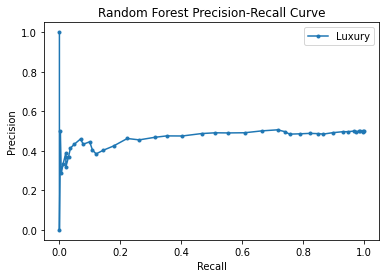

In [276]:
plt.plot(rf_recall, rf_precision, marker='.', label='Luxury')
#axis labels
plt.title("Random Forest Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
#Legend
plt.legend()

## Model 2.4 - KNN Model (Simple Model) - Time Permitting

## Data Prep - SMOTE [Imbalance] and scale
[Logistric Regression Cumulative Lab](https://github.com/learn-co-curriculum/dsc-logistic-regression-lab/tree/solution)

In [ ]:
#Without pipeline SMOTE and scaling

In [ ]:
##With Pipeline introduction

## 2nd Iteration Simple Model[LogReg,Decision Tree, Random Forest] w/ pipeline here

In [ ]:
## 3rd Iteration - Choose best model to go on with [Grid/Random Searching ] Maybe Random Forest with pipeline

# Evaluation

## Things to combe back and add

[Frequency dist of values in variables](https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial#9.-Exploratory-data-analysis-) 
[Visualize Decision Tree]